In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, IntSlider
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('../../data/Superstore/Sample - Superstore.csv', encoding='latin1')

df.columns = df.columns.str.strip()

print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
df.head()
df.info()
df.describe()
df.isnull().sum()

Dataset Shape: (9994, 21)
Column Names: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New dataset shape: {df.shape}")
else:
    print("No duplicates found.")

Number of duplicate rows: 0
No duplicates found.


In [14]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# df = df.dropna()
# no missing values found


Missing values per column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [16]:
date_columns = ['Order Date', 'Ship Date']

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

print("Data types after conversion:")
print(df[date_columns].dtypes)

print("\nAny missing after conversion:")
print(df[date_columns].isnull().sum())


Data types after conversion:
Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

Any missing after conversion:
Order Date    0
Ship Date     0
dtype: int64


In [17]:
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

df['Order Month-Year'] = df['Order Date'].dt.to_period('M')

df[['Sales', 'Profit', 'Profit Margin', 'Order Year', 'Order Month', 'Order Month-Year']].head()

,Sales,Profit,Profit Margin,Order Year,Order Month,Order Month-Year
0,261.9600,41.9136,16.00,2016,11,2016-11
1,731.9400,219.5820,30.00,2016,11,2016-11
2,14.6200,6.8714,47.00,2016,6,2016-06
3,957.5775,-383.0310,-40.00,2015,10,2015-10
4,22.3680,2.5164,11.25,2015,10,2015-10


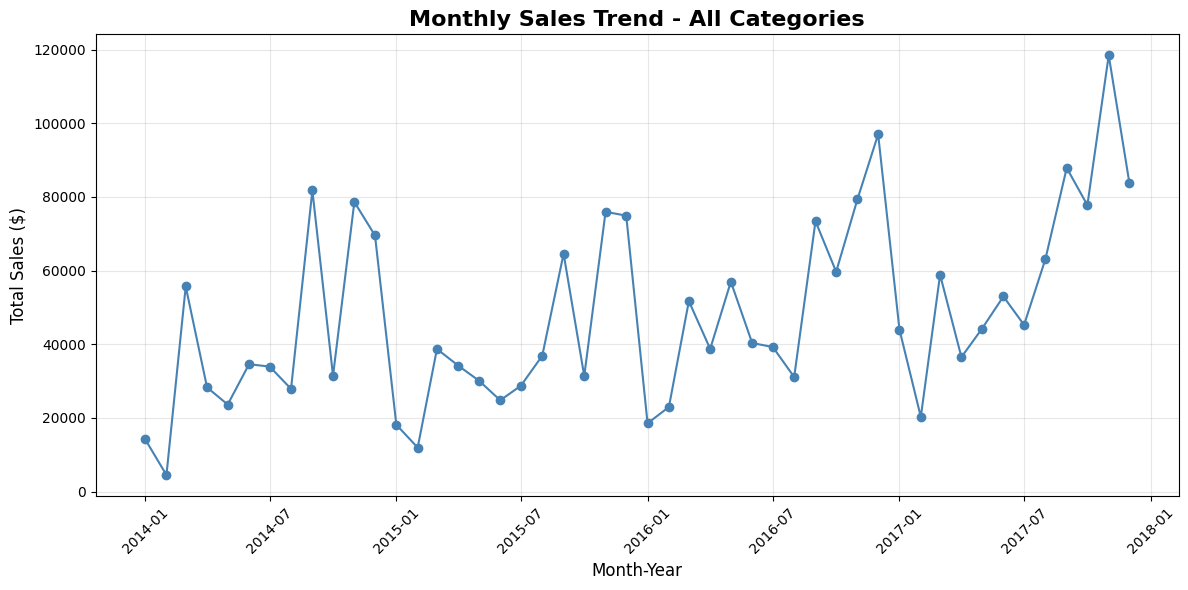

In [18]:
import matplotlib.pyplot as plt

monthly_sales_total = df.groupby('Order Month-Year')['Sales'].sum().reset_index()
monthly_sales_total['Date'] = monthly_sales_total['Order Month-Year'].dt.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales_total['Date'], monthly_sales_total['Sales'], marker='o', linestyle='-', color='steelblue')
plt.title('Monthly Sales Trend - All Categories', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
monthly_sales_category = df.groupby(['Order Month-Year', 'Category'])['Sales'].sum().reset_index()
monthly_sales_category['Date'] = monthly_sales_category['Order Month-Year'].dt.to_timestamp()

def plot_monthly_sales(category='All'):
    plt.figure(figsize=(12,6))
    
    if category == 'All':
        total_monthly = df.groupby('Order Month-Year')['Sales'].sum().reset_index()
        total_monthly['Date'] = total_monthly['Order Month-Year'].dt.to_timestamp()
        plt.plot(total_monthly['Date'], total_monthly['Sales'], marker='o', color='steelblue')
        plt.title('Monthly Sales Trend - All Categories', fontsize=16, fontweight='bold')
    else:
        data = monthly_sales_category[monthly_sales_category['Category'] == category]
        plt.plot(data['Date'], data['Sales'], marker='o', color='orange')
        plt.title(f'Monthly Sales Trend - {category}', fontsize=16, fontweight='bold')
    
    plt.xlabel('Month-Year', fontsize=12)
    plt.ylabel('Sales ($)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

categories = ['All'] + df['Category'].unique().tolist()
interact(plot_monthly_sales, category=Dropdown(options=categories, value='All', description='Category:'));

interactive(children=(Dropdown(description='Category:', options=('All', 'Furniture', 'Office Supplies', 'Techn…

In [ ]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=True)

def plot_top_states(top_n=10):
    plt.figure(figsize=(12, max(6, top_n * 0.4)))
    
    top_states = state_sales.tail(top_n)
    
    bars = plt.barh(range(len(top_states)), top_states.values, color='steelblue')
    plt.yticks(range(len(top_states)), top_states.index)
    plt.xlabel('Total Sales ($)', fontsize=12)
    plt.ylabel('State', fontsize=12)
    plt.title(f'Top {top_n} States by Sales Performance', fontsize=16, fontweight='bold')
    
    for i, value in enumerate(top_states.values):
        plt.text(value + max(top_states.values)*0.01, i, f'${value:,.0f}', va='center', fontsize=10)
    
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Total states analyzed: {len(state_sales)}")
    print(f"Top {top_n} states represent: ${top_states.sum():,.0f} in sales")

top_n_slider = IntSlider(min=5, max=25, value=10, description='Top N States:')
interact(plot_top_states, top_n=top_n_slider)

interactive(children=(IntSlider(value=10, description='Top N States:', max=25, min=5), Output()), _dom_classes…

<function __main__.plot_top_states(top_n=10)>

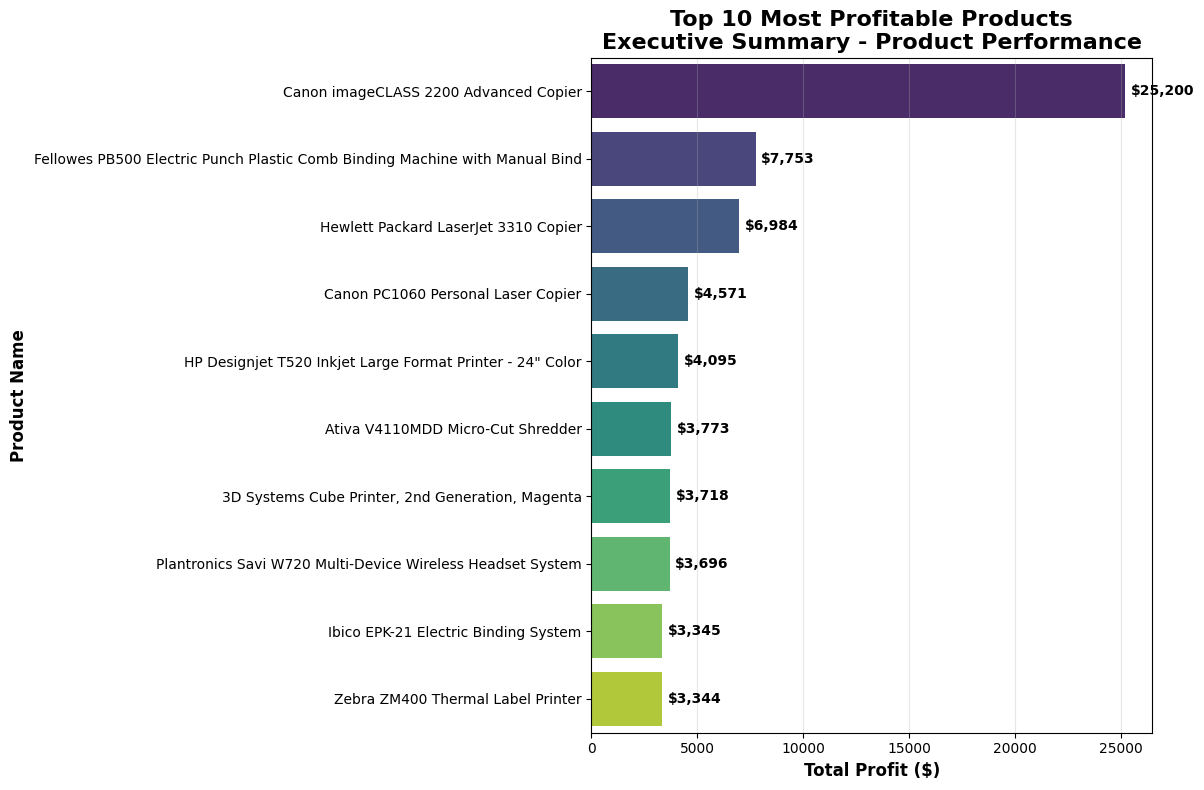

Key Insights:
• Most profitable product generates: $25,200
• Top 10 products contribute: $66,479 total profit
• Average profit per top product: $6,648


In [22]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
ax = sns.barplot(x=top_products.values, y=top_products.index, palette='viridis', orient='h')

plt.title('Top 10 Most Profitable Products\nExecutive Summary - Product Performance', fontsize=16, fontweight='bold')
plt.xlabel('Total Profit ($)', fontsize=12, fontweight='bold')
plt.ylabel('Product Name', fontsize=12, fontweight='bold')

for i, profit in enumerate(top_products.values):
    ax.text(profit + max(top_products.values)*0.01, i, f'${profit:,.0f}', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Key Insights:")
print(f"• Most profitable product generates: ${top_products.iloc[0]:,.0f}")
print(f"• Top 10 products contribute: ${top_products.sum():,.0f} total profit")
print(f"• Average profit per top product: ${top_products.mean():,.0f}")

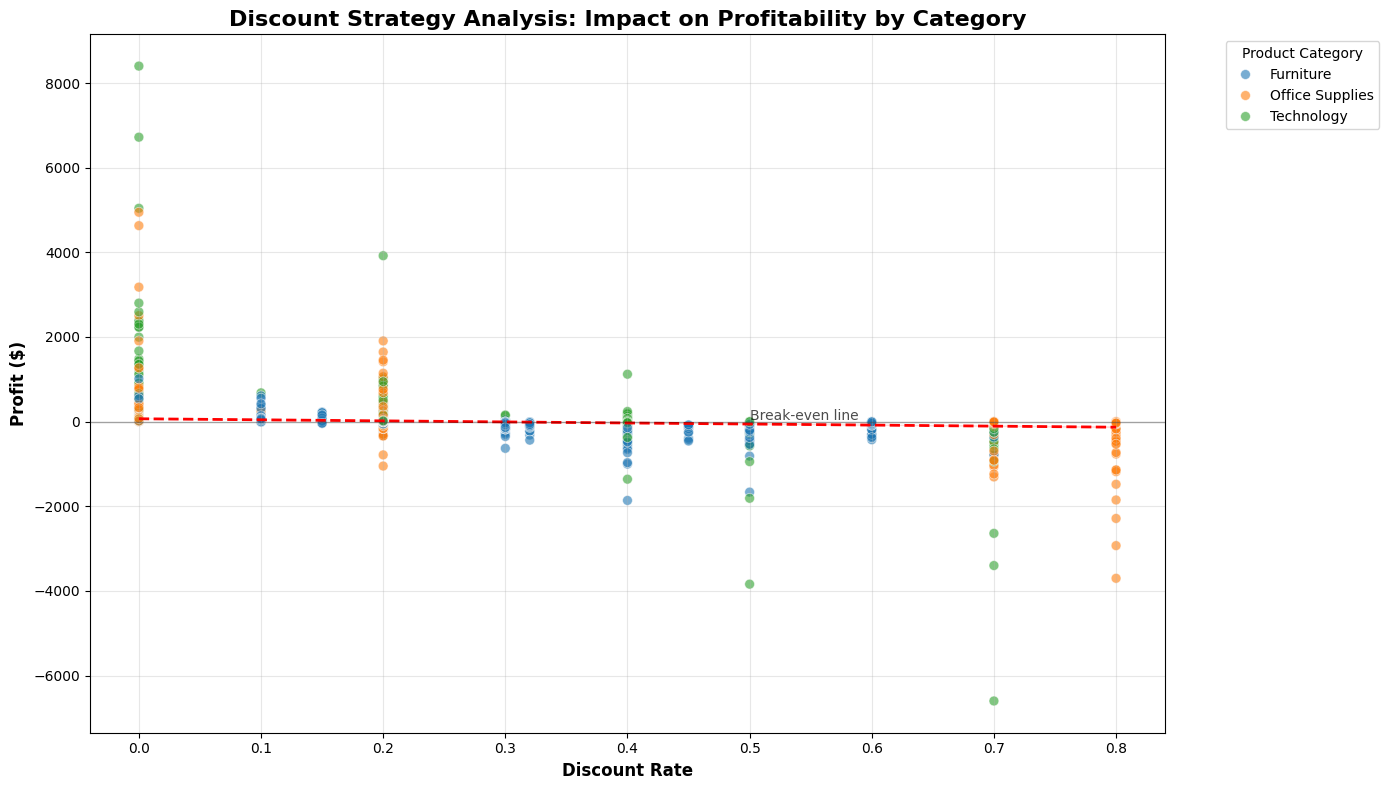

Discount Analysis Insights:
• Transactions with >20% discount: 1,393
• Average profit for high discounts: $-97.18
• Percentage of high-discount sales with losses: 96.8%

Category-specific discount impact:
• Furniture: Average profit at >20% discount = $-100.51
• Office Supplies: Average profit at >20% discount = $-69.32
• Technology: Average profit at >20% discount = $-197.42


In [23]:
plt.figure(figsize=(14,8))

sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.6, s=50)

sns.regplot(data=df, x='Discount', y='Profit', scatter=False, color='red', line_kws={'linewidth':2, 'linestyle':'--'})

plt.title('Discount Strategy Analysis: Impact on Profitability by Category', fontsize=16, fontweight='bold')
plt.xlabel('Discount Rate', fontsize=12, fontweight='bold')
plt.ylabel('Profit ($)', fontsize=12, fontweight='bold')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)
plt.text(0.5, 50, 'Break-even line', fontsize=10, alpha=0.7)

plt.grid(True, alpha=0.3)
plt.legend(title='Product Category', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

high_discount = df[df['Discount'] > 0.2]
print("Discount Analysis Insights:")
print(f"• Transactions with >20% discount: {len(high_discount):,}")
print(f"• Average profit for high discounts: ${high_discount['Profit'].mean():.2f}")
print(f"• Percentage of high-discount sales with losses: {(high_discount['Profit'] < 0).mean()*100:.1f}%\n")

print("Category-specific discount impact:")
for category in df['Category'].unique():
    cat_data = df[df['Category'] == category]
    high_disc_cat = cat_data[cat_data['Discount'] > 0.2]
    if len(high_disc_cat) > 0:
        avg_loss = high_disc_cat['Profit'].mean()
        print(f"• {category}: Average profit at >20% discount = ${avg_loss:.2f}")

In [ ]:
import time

print("=== LIBRARY COMPARISON ANALYSIS ===\n")

print("MATPLOTLIB STRENGTHS:")
print("• Fine-grained control over interactive widgets")
print("• Custom annotations and text positioning")
print("• Precise subplot layouts and figure sizing")
print("• Integration with ipywidgets for dynamic updates\n")

print("SEABORN STRENGTHS:")
print("• Built-in statistical visualizations (regplot, scatterplot)")
print("• Automatic color palettes and legends")
print("• Clean, publication-ready default styling")
print("• Easy categorical data visualization\n")

start = time.time()
plt.figure(figsize=(8,6))
plt.plot(df.groupby('Order Year')['Sales'].sum())
plt.close()
matplotlib_time = time.time() - start

start = time.time()
plt.figure(figsize=(8,6))
sns.lineplot(data=df.groupby('Order Year')['Sales'].sum().reset_index(), x='Order Year', y='Sales')
plt.close()
seaborn_time = time.time() - start

print("SPEED COMPARISON:")
print(f"• Matplotlib basic plot: {matplotlib_time:.4f} seconds")
print(f"• Seaborn equivalent: {seaborn_time:.4f} seconds\n")

print("RECOMMENDATION:")
print("• Use Matplotlib for rapid exploration and interactive visualizations.")
print("• Use Seaborn for stakeholder-facing presentations for clean, publication-ready aesthetics.")

=== LIBRARY COMPARISON ANALYSIS ===

MATPLOTLIB STRENGTHS:
• Fine-grained control over interactive widgets
• Custom annotations and text positioning
• Precise subplot layouts and figure sizing
• Integration with ipywidgets for dynamic updates

SEABORN STRENGTHS:
• Built-in statistical visualizations (regplot, scatterplot)
• Automatic color palettes and legends
• Clean, publication-ready default styling
• Easy categorical data visualization

SPEED COMPARISON:
• Matplotlib basic plot: 0.0180 seconds
• Seaborn equivalent: 0.0352 seconds

RECOMMENDATION:
• Use Matplotlib for rapid exploration and interactive visualizations.
• Use Seaborn for stakeholder-facing presentations for clean, publication-ready aesthetics.


In [25]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100

state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
top_state = state_sales.index[0]
top_state_sales = state_sales.iloc[0]

top_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).index[0]
top_product = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).index[0]

high_discount_loss_rate = (df[df['Discount'] > 0.2]['Profit'] < 0).mean() * 100

print("=== EXECUTIVE SUMMARY - KEY FINDINGS ===\n")

print("📊 BUSINESS PERFORMANCE:")
print(f"• Total Revenue: ${total_sales:,.0f}")
print(f"• Total Profit: ${total_profit:,.0f}")
print(f"• Overall Profit Margin: {profit_margin:.1f}%\n")

print("🗺️ GEOGRAPHIC PERFORMANCE:")
print(f"• Top performing state: {top_state} (${top_state_sales:,.0f})")
print(f"• Top 5 states contribute: {(state_sales.head(5).sum()/total_sales)*100:.1f}% of total sales\n")

print("🏆 PRODUCT PERFORMANCE:")
print(f"• Leading category: {top_category}")
print(f"• Most profitable product: {top_product}\n")

print("💰 DISCOUNT STRATEGY INSIGHTS:")
print(f"• High discount risk: {high_discount_loss_rate:.1f}% of >20% discounts result in losses")
print(f"• Recommended max discount threshold: 20% to maintain profitability")

=== EXECUTIVE SUMMARY - KEY FINDINGS ===

📊 BUSINESS PERFORMANCE:
• Total Revenue: $2,297,201
• Total Profit: $286,397
• Overall Profit Margin: 12.5%

🗺️ GEOGRAPHIC PERFORMANCE:
• Top performing state: California ($457,688)
• Top 5 states contribute: 52.0% of total sales

🏆 PRODUCT PERFORMANCE:
• Leading category: Technology
• Most profitable product: Canon imageCLASS 2200 Advanced Copier

💰 DISCOUNT STRATEGY INSIGHTS:
• High discount risk: 96.8% of >20% discounts result in losses
• Recommended max discount threshold: 20% to maintain profitability
